## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
%matplotlib inline

In [4]:
path = r'/Users/ajahanderson/Documents/Book Data'

In [5]:
df = pd.read_csv(os.path.join(path,'2 Data','Prepared Data','book_dataset_cleaned.csv'),index_col = False)

In [6]:
sub = df[['Quantity', 'Item Price', 'Shipping-Price', 'Total', 'Profit %', 'Profit (INR)', 'Cost Price']]


In [7]:
sub

,Quantity,Item Price,Shipping-Price,Total,Profit %,Profit (INR),Cost Price
0,1,999.0,85.0,1084.0,13,129.87,869.13
1,1,640.0,85.0,725.0,17,108.80,531.20
2,1,715.0,85.0,800.0,17,121.55,593.45
3,1,565.0,85.0,650.0,13,73.45,491.55
4,1,494.0,85.0,579.0,13,64.22,429.78
...,...,...,...,...,...,...,...
3435,1,379.0,89.0,468.0,13,49.27,329.73
3436,1,655.0,89.0,744.0,17,111.35,543.65
3437,1,554.0,89.0,643.0,17,94.18,459.82
3438,1,379.0,89.0,468.0,13,49.27,329.73


In [8]:

sub = sub.loc[sub.max(axis=1) <= 1600]


In [9]:
sub

,Quantity,Item Price,Shipping-Price,Total,Profit %,Profit (INR),Cost Price
0,1,999.0,85.0,1084.0,13,129.87,869.13
1,1,640.0,85.0,725.0,17,108.80,531.20
2,1,715.0,85.0,800.0,17,121.55,593.45
3,1,565.0,85.0,650.0,13,73.45,491.55
4,1,494.0,85.0,579.0,13,64.22,429.78
...,...,...,...,...,...,...,...
3435,1,379.0,89.0,468.0,13,49.27,329.73
3436,1,655.0,89.0,744.0,17,111.35,543.65
3437,1,554.0,89.0,643.0,17,94.18,459.82
3438,1,379.0,89.0,468.0,13,49.27,329.73


### 2. The elbow technique

In [10]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-694924886.0810248,
 -184878875.45853585,
 -93320922.75463106,
 -45502116.646273784,
 -33053701.618516255,
 -25660682.69390338,
 -19333493.319658928,
 -15192428.937101465,
 -12698057.374475036]

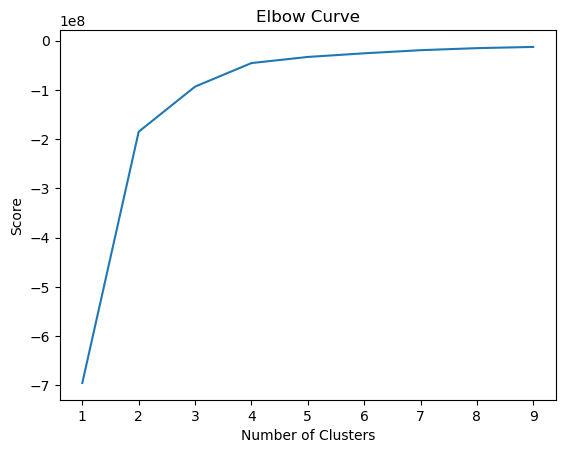

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I will opt for the number 4. The values exhibit a swift increase from 1 to 4, followed by a stabilization beyond 4. This suggests that the ideal cluster count is 4.


In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(sub)

/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [15]:
sub['clusters'] = kmeans.fit_predict(sub)

/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
sub.head()

,Quantity,Item Price,Shipping-Price,Total,Profit %,Profit (INR),Cost Price,clusters
0,1,999.0,85.0,1084.0,13,129.87,869.13,1
1,1,640.0,85.0,725.0,17,108.80,531.20,3
2,1,715.0,85.0,800.0,17,121.55,593.45,3
3,1,565.0,85.0,650.0,13,73.45,491.55,3
4,1,494.0,85.0,579.0,13,64.22,429.78,0


In [17]:
sub['clusters'].value_counts()

clusters
2    1718
0     851
3     574
1     297
Name: count, dtype: int64

/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


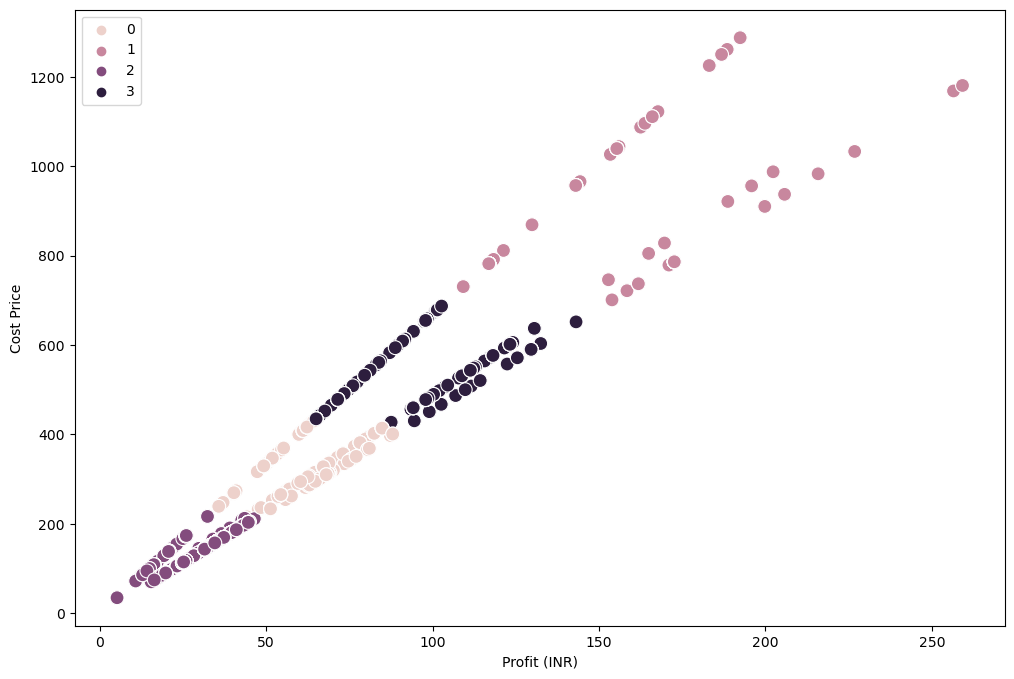

In [18]:
# Plot the clusters for the "Profit (INR)" and "Cost Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Profit (INR)'], y=sub['Cost Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Profit (INR)') # Label x-axis.
plt.ylabel('Cost Price') # Label y-axis.
plt.show()

/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


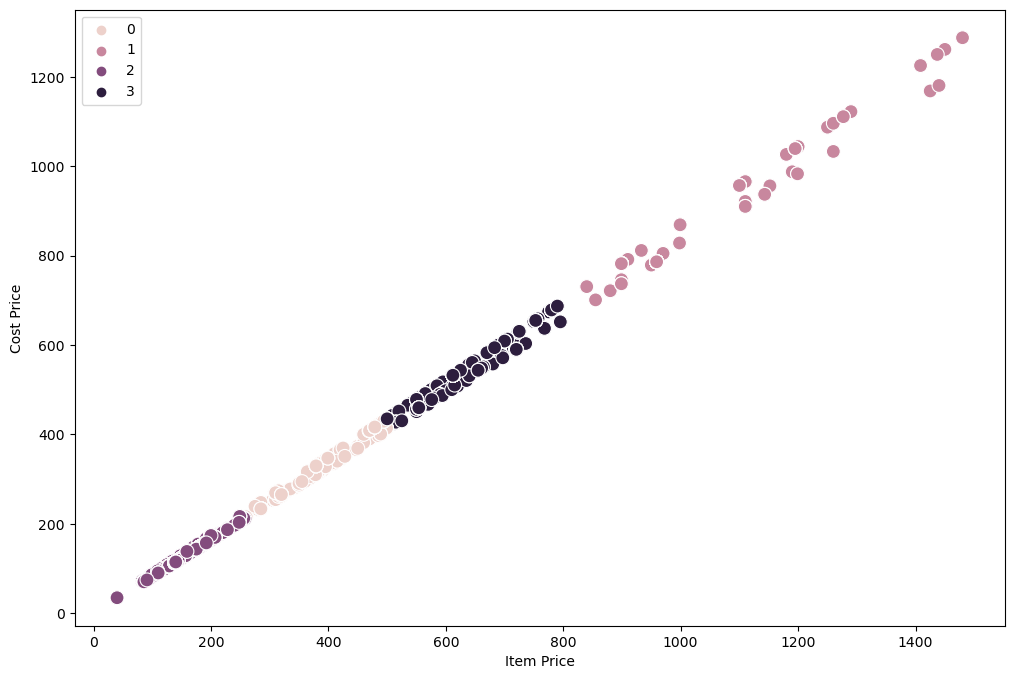

In [19]:
# Plot the clusters for the "Item Price" and "Cost Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Item Price'], y=sub['Cost Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Item Price') # Label x-axis.
plt.ylabel('Cost Price') # Label y-axis.
plt.show()

 Four identifiable clusters were chosen using the elbow technique. The scatterplot illustrates a positive correlation within each cluster, indicating that an increase in cost price is associated with higher profits. Similarly, another cluster exhibits a positive correlation, demonstrating that as item price increases, so does the associated cost price.

In [20]:
#create a column that renames the clusters to colors 
sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/5t/s295bnhn7bvf1407s3py_b8h0000gn/T/ipykernel_39544/502926968.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'


In [21]:
sub.groupby('cluster').agg({
    'Quantity':['mean','median'],
    'Item Price':['mean','median'],
    'Shipping-Price':['mean','median'],
    'Total':['mean','median'],
    'Profit %':['mean','median'], 
    'Profit (INR)':['mean','median'],
    'Cost Price':['mean','median']
})

Quantity         Item Price        Shipping-Price         \
                 mean median        mean median           mean median   
cluster                                                                 
black        1.026132    1.0  635.317073  638.5      86.621951   85.0   
dark purple  1.009895    1.0  152.904115  155.0      75.102806   67.0   
pink         1.059929    1.0  373.321998  385.0      73.545358   65.0   
purple       1.188552    1.0  980.345118  959.0      95.801347   85.0   

                   Total           Profit %        Profit (INR)          \
                    mean  median       mean median         mean  median   
cluster                                                                   
black         721.939024   717.5  15.026132   13.0    95.434774   96.00   
dark purple   228.006921   230.0  17.580908   18.0    26.893899   27.90   
pink          446.867356   460.0  16.638073   17.0    61.726890   63.70   
purple       1076.146465  1049.0  14.915825   13.0   146.561633  152.83   

             Cost Price          
                   mean  median  
cluster                          
black        539.882300  532.44  
dark purple  126.010216  127.10  
pink         311.595107  327.85  
purple       833.783485  786.38

pink was the lowest on the graph and also produces the lowest quanitity, item price, total, profit, and cost price for the aggregate function

purple results match up with the chart placements 

dark purple results match up with the chart placements

Black was the highest on the graph and also produces the highest quanitity, item price, total, profit, and cost price for the aggregate function

### What factors determine the shipping cost, and how do the profit percentage and actual amount correlate? Additionally, why does the pink cluster show the highest profit percentage even though it doesn't have the highest profit? 

In [28]:
sub.to_csv(os.path.join(path, '2 Data','Prepared Data', 'clusters.csv'))